##### Проект Сафина Рената (гр. 11-923)

В качестве анализируемой выборки взят датасет по городам мира, включающий в себя следующую информацию:
- страна
- название города
- название города (альтернативное написание)
- регион
- население
- широта
- долгота

Источник:
https://www.kaggle.com/max-mind/world-cities-database/data

Сначала импортируем библиотеки, которые понадобятся для анализа выборки.

In [2]:
import warnings

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

warnings.filterwarnings('ignore')

Импортируем и подготовим данные.

In [3]:
df = pd.read_csv('E:\ИТИС\Методология науч-исл-й\Проект\world-cities-database\worldcitiespop.csv')
df.head(100)

,Country,City,AccentCity,Region,Population,Latitude,Longitude
0,ad,aixas,Aixàs,6,NaN,42.483333,1.466667
1,ad,aixirivali,Aixirivali,6,NaN,42.466667,1.500000
2,ad,aixirivall,Aixirivall,6,NaN,42.466667,1.500000
3,ad,aixirvall,Aixirvall,6,NaN,42.466667,1.500000
4,ad,aixovall,Aixovall,6,NaN,42.466667,1.483333
...,...,...,...,...,...,...,...
95,ae,abu zabi,Abu Zabi,1,NaN,24.466667,54.366667
96,ae,abu zabye,Abu Zabye,1,NaN,24.466667,54.366667
97,ae,abu zabyo,Abu Zabyo,1,NaN,24.466667,54.366667
98,ae,ad dharbaniya,Ad Dharbaniya,5,NaN,25.783333,55.933333


Одной из наиболее естественных статистик любой выборки является __среднее арифметическое__ (или __выборочное среднее__):

$$\overline{x} = \dfrac{1}{m} \displaystyle\sum_{i = 1}^m x_i.$$

Выборочное среднее является оценкой для математического ожидания.

Найдем выборочное среднее количества населения из датасета с помощью метода .mean

In [4]:
df['Population'].mean()
print(f"{df['Population'].mean():.3f}")

47719.571


Другой важной статистикой выборки является __среднее квадратическое отклонение__:

$$\sigma = \sqrt{\dfrac{1}{m} \displaystyle\sum_{i = 1}^m (x_i - \overline{x})^2}.$$

Оно показывает уровень «разброса» элементов выборки относительно выборочного среднего.

Посчитаем среднее квадратическое отклонение количества населения в городах мира.

In [5]:
population_std = np.sqrt(((df['Population'] - df['Population'].mean()) ** 2).sum() / df['Population'].count())
print(f"{population_std:.3f}")

302885.559


Эту же величину можно вычислить сразу с помощью метода `.std`.

In [6]:
df['Population'].std(ddof=0)
print(f"{df['Population'].std(ddof=0):.3f}")

302885.559


Дисперсию случайной величины можно оценивать средним квадратическим отклонением выборки, возведённым в квадрат:

$$\sigma^2 = \dfrac{1}{m} \displaystyle\sum_{i = 1}^m (x_i - \overline{x})^2.$$


Такая оценка дисперсии называется __смещённой выборочной дисперсией__.

Посчитаем дисперсию количества населения в городах мира.

In [7]:
population_variance = ((df['Population'] - df['Population'].mean()) ** 2).sum() / df['Population'].count()
print(f"{population_variance:.3f}")

91739661974.342


__Несмещённая__ (или __исправленная__) __выборочная дисперсия__ вычисляется немного иначе:

$$\sigma_{\text{unbiased}}^2 = \dfrac{1}{m - 1} \displaystyle\sum_{i = 1}^m (x_i - \overline{x})^2.$$

Почему несмещённая?

На самом деле каждый объект из выборки — это тоже случайная величина (поскольку выбирается _случайным_ образом). В таком случае и любая статистика (т.е. функция от выборки) является случайной величиной.

Оценка некоторого параметра случайной величины называется __несмещённой__, если математическое ожидание этой оценки равняется реальному значению этого параметра.

Например, выборочное среднее является несмещённой оценкой математического ожидания.

Оказывается, среднее квадратическое отклонение, возведённое в квадрат, не является несмещённой оценкой реальной дисперсии: если берётся выборка $x = (x_1, x_2, \dots, x_m)$ из значений случайной величины $X$, то

$$M(\sigma^2) = \dfrac{m - 1}{m} \cdot D(X).$$

Поэтому для оценки дисперсии используется именно несмещённая выборочная дисперсия.

Посчитаем несмещённую выборочную дисперсию количества населения в городах мира.

In [8]:
population_variance2 = ((df['Population'] - df['Population'].mean())**2).sum() / (df['Population'].count() - 1)
print(f"{population_variance2:.3f}")

91741574053.835


In [9]:
print(f"{population_variance:.5f}")

91739661974.34230


In [10]:
abs(population_variance - population_variance2)
print(f"{abs(population_variance - population_variance2):.3f}")

1912079.493


In [11]:
df.shape

(3173958, 7)

Оценки дисперсии можно посчитать с помощью метода `.var`. Смещённая:

In [12]:
df['Population'].var(ddof=0)
print(f"{df['Population'].var(ddof=0):.5f}")

91739661974.34288


и несмещённая:

In [13]:
df['Population'].var(ddof=1)
print(f"{df['Population'].var(ddof=1):.3f}")

91741574053.835


Аргумент `ddof` (_Delta Degrees of Freedom_) указывает то, какую величину нужно отнять от числа наблюдений $m$, которое находится в формуле дисперсии в делителе.

### Мода,  медиана, квантиль

__Мода выборки__ — наиболее часто встречающееся в выборке значение. __Мода дискретной случайной величины__ — самое вероятное её значение.

Вычисление моды отличается для дискретных и _непрерывных_ случайных величин (о последних мы поговорим позже). Поэтому для примера возьмём какой-нибудь дискретный признак из наших данных. Таковым является, например, население: он в таблице представлен целыми числами.

Для начала посмотрим, как часто встречаются в выборке те или иные значения количества населения. Это можно сделать с помощью метода `.value_counts`:

In [14]:
df.head()

,Country,City,AccentCity,Region,Population,Latitude,Longitude
0,ad,aixas,Aixàs,6,NaN,42.483333,1.466667
1,ad,aixirivali,Aixirivali,6,NaN,42.466667,1.500000
2,ad,aixirivall,Aixirivall,6,NaN,42.466667,1.500000
3,ad,aixirvall,Aixirvall,6,NaN,42.466667,1.500000
4,ad,aixovall,Aixovall,6,NaN,42.466667,1.483333


In [15]:
df['Population'].value_counts()

2310.0     12
2230.0     11
2684.0     11
2137.0     11
3097.0     11
           ..
26282.0     1
26287.0     1
26288.0     1
26289.0     1
512.0       1
Name: Population, Length: 28753, dtype: int64

Чаще всего встречается значение 2310. Это и есть мода. Её можно также посчитать с помощью метода `.mode`:

In [16]:
df['Population'].mode()

0    2310.0
dtype: float64

In [17]:
df.mode()

,Country,City,AccentCity,Region,Population,Latitude,Longitude
0,cn,san jose,San Antonio,7,2310.0,51.15,23.8


__Медиана выборки__ — такое значение $a$, что хотя бы половина элементов из выборки меньше, либо равна $a$, и, соответственно, хотя бы половина больше, либо равна $a$.

Посчитаем медиану количества населения в городах мира. Для начала воспользуемся определением. В таком случае нам достаточно отсортировать значения из выборки и взять середину этого массива.

In [18]:
population = sorted(df['Population'])

len(population)

3173958

In [19]:
population[:15]

[nan, nan, nan, nan, nan, nan, 20430.0, nan, nan, nan, nan, nan, nan, nan, nan]

Выведем несколько значений вокруг середины этого массива.

In [20]:
length = len(population)

population[length // 2 - 5 : length // 2 + 5]

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

Как мы видим, в середине массива находятся города с отсутствующими данными по населению. Поэтому данный способ нахождения медианы в данном случае не работает. Воспользуемся встроенной функцией .median() для определения медианнного значения анализируемой выборки

In [21]:
df['Population'].median()

10779.0

В случаях, когда число элементов в выборке нечётно, медианой является значение, которое стоит ровно посередине отсортированного массива. Если же в массиве чётное число значений, ровную середину посчитать невозможно, поэтому медианой может служить любое значение между крайним правым значением левой половины и крайним левым значением правой половины.

Понятие __квантиля__ обобщает понятие медианы. Если $\alpha \in (0, 1)$, то __квантилем порядка $\alpha$ случайной величины $X$__ называется такое значение $X_\alpha$, что

$$P(X \leq X_\alpha) \geq \alpha, \: P(X \geq X_\alpha) \geq 1 - \alpha.$$

В случае выборки это означает, что хотя бы доля $\alpha$ от всех значений выборки оказываются меньше, либо равны $X_\alpha$ и, наоборот, хотя бы доля $1 - \alpha$ от значений больше, либо равны $X_\alpha$.

Использование квантилей позволяет в некотором смысле «обратить» функцию вероятности.

Прямая задача выглядит следующим образом: имеется случайная величина $X$ и пороговое значение $t$. Требуется найти вероятность того, что случайная величина $X$ не превосходит значения $t$.

Часто в задачах математической статистики требуется решить обратную задачу: имеется случайная величина $X$ и значение вероятности $\alpha \in (0, 1)$. Требуется найти пороговое значение $t$, такое, что $P(X \leq t) = \alpha$.
Это и есть квантиль порядка $\alpha$.

В частности, медиана является квантилем порядка $0.5$. Кроме того, часто используют

* __первый квартиль__ — квантиль порядка $0.25$ (т.е. значение, которое не превышают $25 \%$ значений из выборки),
* __второй квартиль__ — то же, что и медиана,
* __третий квартиль__ — квантиль порядка $0.75$.

Квантили можно посчитать с помощью метода `.quantile`:

Посчитаем первый и третий квартили значений населения городов мира. Вычисления аналогичны случаю вычисления медианы, однако нам нужно делить массив не в пропорции $1 : 1$, а в пропорции $\alpha : (1 - \alpha)$. Например, первый квартиль:

In [22]:
population[length // 4 - 5 : length // 4 + 5]

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

In [23]:
df['Population'].quantile(0.25)

3732.0

Третий квартиль:

In [24]:
population[length * 3 // 4 - 5 : length * 3// 4 + 5]

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

In [25]:
df['Population'].quantile(0.75)

27990.5

В этот метод можно подать список значений, тогда посчитаются различные квантили:

In [26]:
df['Population'].quantile([0.25, 0.5, 0.75])

0.25     3732.0
0.50    10779.0
0.75    27990.5
Name: Population, dtype: float64

__Интерквартильный размах__ — это отрезок между первым и третьим квартилями. Это отрезок, в который попадают $50 \%$ значений выборки.

Интерквартильный размах используется для измерения разброса значений выборки вокруг среднего. Иногда его использование оказывается более предпочтительным, чем использование среднего квадратического отклонения, поскольку не учитывает выбросы в данных.

Например, в наших данных интерквартильный размах — это отрезок от $180$ до $188$. _Интерквартильное расстояние_ в этом случае равно $8$.

В зависимости от задачи и удобства могут также встречаться __децили__ и __перцентили__.

__Децили__ — то же, что и квартили, но делим мы не на $4$ части, а на $10$. Например, медиана будет _пятым децилем_.

__Перцентили__ — это просто другой способ задать квантиль. Здесь мы используем не долю $\alpha \in (0, 1)$, а процент. Например, третий квартиль будет $75$-перцентилем.

In [27]:
list_ = [1] * 1000 + [10000]

In [28]:
np.mean(list_)

10.989010989010989

In [29]:
np.std(list_, ddof=1)

316.03816364344493

In [30]:
np.quantile(list_, [0.25, 0.75])

array([1., 1.])

### Графическое представление данных

Для визуализации распределения значений выборки часто используется гистограмма. Как строится гистограмма?

1. По оси $x$ откладываются всевозможные значения из выборки. 
2. Вся ось разбивается на какое-то заданное число одинаковых отрезков.
3. Для каждого отрезка вычисляется число значений выборки, которые лежат в этом отрезке, и это число откладывается по оси $y$.

Построим гистограмму значений населения городов мира. Для этого можно использовать метод `.hist`. В качестве аргумента `bins` сюда подаётся то число одинаковых отрезков, на которое мы разбиваем ось $x$.

(array([4.7922e+04, 3.5000e+01, 1.2000e+01, 8.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([7.00000000e+00, 3.14805610e+06, 6.29610520e+06, 9.44415430e+06,
        1.25922034e+07, 1.57402525e+07, 1.88883016e+07, 2.20363507e+07,
        2.51843998e+07, 2.83324489e+07, 3.14804980e+07]),
 <a list of 10 Patch objects>)

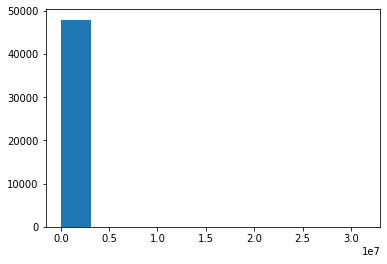

In [31]:
plt.hist(df['Population'])

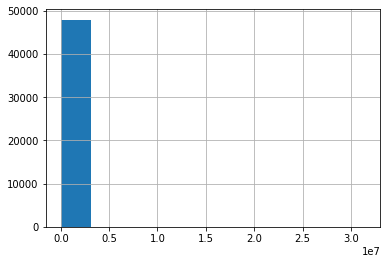

In [32]:
df['Population'].hist()

Построим гистограмму ещё раз, указав в качестве аргумента `bins` число $5$, чтобы получить более детальную картину:

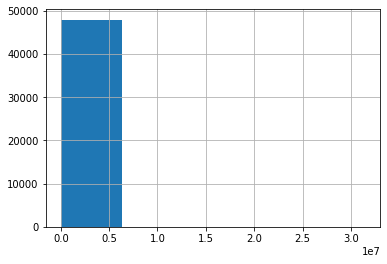

In [38]:
df['Population'].hist(bins=5)

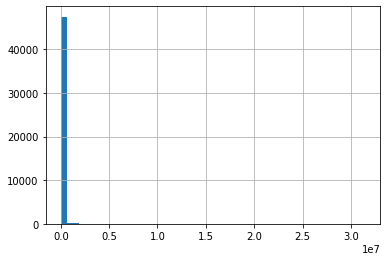

In [39]:
df['Population'].hist(bins=50)

Другой способ визуализировать одномерные данные — __boxplot__ или __ящик с усами__. В самом ящике отмечены квартили $Q1$, $Q2$ (медиана), $Q3$. «Усы» здесь — границы отрезка
$$\left[ Q1 - 1.5 \times IQR, \: Q3 + 1.5 \times IQR \right],$$
где $IQR$ — интерквартильное расстояние.

Построим `boxplot` населения городов мира.

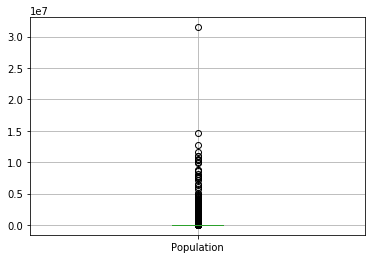

In [40]:
df[['Population']].boxplot()

Всё, что выходит за границы этого отрезка, считается выбросами (отмечены кружками). Посчитаем, сколько значений населения городов оказалось за пределами «усов».

In [41]:
q1 = df['Population'].quantile(0.25)
q3 = df['Population'].quantile(0.75)

iqr = q3 - q1

boxplot_range = (q1 - 1.5 * iqr, q3 + 1.5 * iqr)
boxplot_range

(-32655.75, 64378.25)

In [42]:
outliers = df.loc[(df['Population'] < boxplot_range[0]) | (df['Population'] > boxplot_range[1])]

outliers.shape[0]

5695

In [43]:
outliers

,Country,City,AccentCity,Region,Population,Latitude,Longitude
93,ae,abu dhabi,Abu Dhabi,1,603687.0,24.466667,54.366667
242,ae,dubai,Dubai,3,1137376.0,25.258172,55.304717
490,ae,sharjah,Sharjah,6,543942.0,25.357310,55.403304
6644,af,baglan,Baglan,3,108481.0,36.130684,68.708286
24457,af,gardez,Gardez,36,103732.0,33.597439,69.225922
...,...,...,...,...,...,...,...
3173161,zw,kwekwe,Kwekwe,4,116332.0,-18.916667,29.816667
3173312,zw,marondera,Marondera,4,82294.0,-18.183333,31.550000
3173329,zw,masvingo,Masvingo,7,86772.0,-20.083333,30.833333
3173478,zw,mutare,Mutare,4,253449.0,-18.966667,32.666667


Доля выбросов:

In [45]:
outliers.shape[0] / df.shape[0]

0.001794289653486278



### Взаимосвязь величин. Параметрические и непараметрические показатели корреляции.  Корреляционный анализ

__Корреляция__ — математический показатель, по которому можно судить, есть ли статистическая взаимосвязь между двумя и более случайными величинами.

__Коэффициент корреляции__ принимает значения из отрезка $[-1, 1]$.

Если коэффициент корреляции близок к $1$, то между величинами наблюдается прямая связь: увеличение одной величины сопровождается увеличением другой, а уменьшение одной — уменьшением другой.

Если же коэффициент корреляции близок к $-1$, то между величинами есть обратная корреляционная связь: увеличение одной величины сопровождается уменьшением другой и наоборот.

Коэффициент корреляции, равный $0$, говорит о том, что между величинами нет связи, то есть величины изменяются независимо друг от друга.

Посчитаем корреляцию координат городов (широты и долготы). Это можно сделать с помощью метода `.corr`, который есть у объектов `DataFrame`.

In [46]:
df[['Latitude', 'Longitude']].corr()

,Latitude,Longitude
Latitude,1.000000,-0.041037
Longitude,-0.041037,1.000000


В результате получается матрица корреляций. Мы видим, что корреляция широты и долготы местоположения городов стремитися к нулю. Можно сделать вывод, что между этими показателями отсутствует корреляция.

Попробуем найти корреляцию этих признаков с количеством населения:

In [48]:
df[['Latitude', 'Longitude', 'Population']].corr()

,Latitude,Longitude,Population
Latitude,1.000000,-0.041037,-0.043666
Longitude,-0.041037,1.000000,0.033415
Population,-0.043666,0.033415,1.000000


In [49]:
df.describe()

,Population,Latitude,Longitude
count,4.798000e+04,3.173958e+06,3.173958e+06
mean,4.771957e+04,2.718817e+01,3.708886e+01
std,3.028887e+05,2.195262e+01,6.322302e+01
min,7.000000e+00,-5.493333e+01,-1.799833e+02
25%,3.732000e+03,1.163333e+01,7.303175e+00
50%,1.077900e+04,3.249722e+01,3.528000e+01
75%,2.799050e+04,4.371667e+01,9.570354e+01
max,3.148050e+07,8.248333e+01,1.800000e+02


Таким образом, гипотеза о том, что размер населения зависит от координат расположения (широта и долгота) города не подтвердилась. Поиск корреляций других показателей выборки между собой осложняется тем, что прочие параметры имеют строковые значения. Например, при попытке поиска корреляции между страной, городом и размером населения в нем, выходит ошибка (см. пример ниже)

In [51]:
df[['Country', 'City', 'Population']].corr(

SyntaxError: unexpected EOF while parsing (<ipython-input-51-c2b0c5afb342>, line 1)

Подводя итог анализу рассматриваемой выборки, можно сказать, что зависимостей между показателями внутри нее не выявлено. Также необходимо отметить проблему, связанную с отсутствием данных по населению по значительному числу городов, что приводит к искажению статистик по показателю "население". Попытка заменить значения Nan в этом столбце на среднеарифметическое значение с помощью функции df.fillna(df.mean()) приводит к зависанию питона в виду большого числа строк в выборке (более 3.1 млн.).
Уже после проведения данного анализа я решил вернуться к источнику данных и почитать комментарии автора. Судя по всему главной целью данного датасета было собрать координаты всех городов мира для последующего нанесения на некую самодельную карту, поэтому данные по атрибуту "население" не полные.